<a href="https://colab.research.google.com/github/sahilparmar4/ML_Now-2.0/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Name: Sahil Parmar**

<a href = "mailto:sahil4parmar@gmail.com"> Mail </a> |
<a href = "https://github.com/sahilparmar4"> GitHub </a> |
<a href = "https://www.linkedin.com/in/sahil-parmar-4099391bb/"> LinkedIn </a>

Univariate Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/BrainyBeam/train.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train.fillna(0, inplace = True)
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C


In [ ]:
print("Passenger Class: {}".format(train.Pclass.unique()))
print("Sex: {}".format(train.Sex.unique()))
print("Embarked: {}".format(train.Embarked.unique()))
print("Sibling Spouse: {}".format(train.SibSp.unique()))
print("Parent Child: {}".format(train.Parch.unique()))

Passenger Class: [3 1 2]
Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q' 0]
Sibling Spouse: [1 0 3 4 2 5 8]
Parent Child: [0 1 2 5 3 4 6]


In [ ]:
train["Sex"] = train["Sex"].replace(["male", "female"], [1, 0])
train["Embarked"] = train["Embarked"].replace(["S", "C", "Q"], [1, 2, 3])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,1


In [ ]:
train_updated = train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Survived"]]
train_updated.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,1,0
1,1,0,38.0,1,0,71.2833,2,1
2,3,0,26.0,0,0,7.9250,1,1
3,1,0,35.0,1,0,53.1000,1,1
4,3,1,35.0,0,0,8.0500,1,0


In [ ]:
train_updated.to_csv("cleanedData.csv")

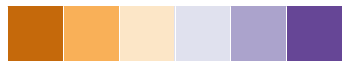

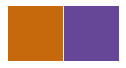

In [ ]:
sb.palplot(sb.color_palette("PuOr"))
pal = sb.color_palette('PuOr', 6)
pal.as_hex()
plt.style.use(['seaborn'])
sb_colors = ["#c6690c", "#664697"]
sb.set_palette(sb_colors)
sb.palplot(sb.color_palette(sb_colors))

In [ ]:
train_updated.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Survived'],
      dtype='object')

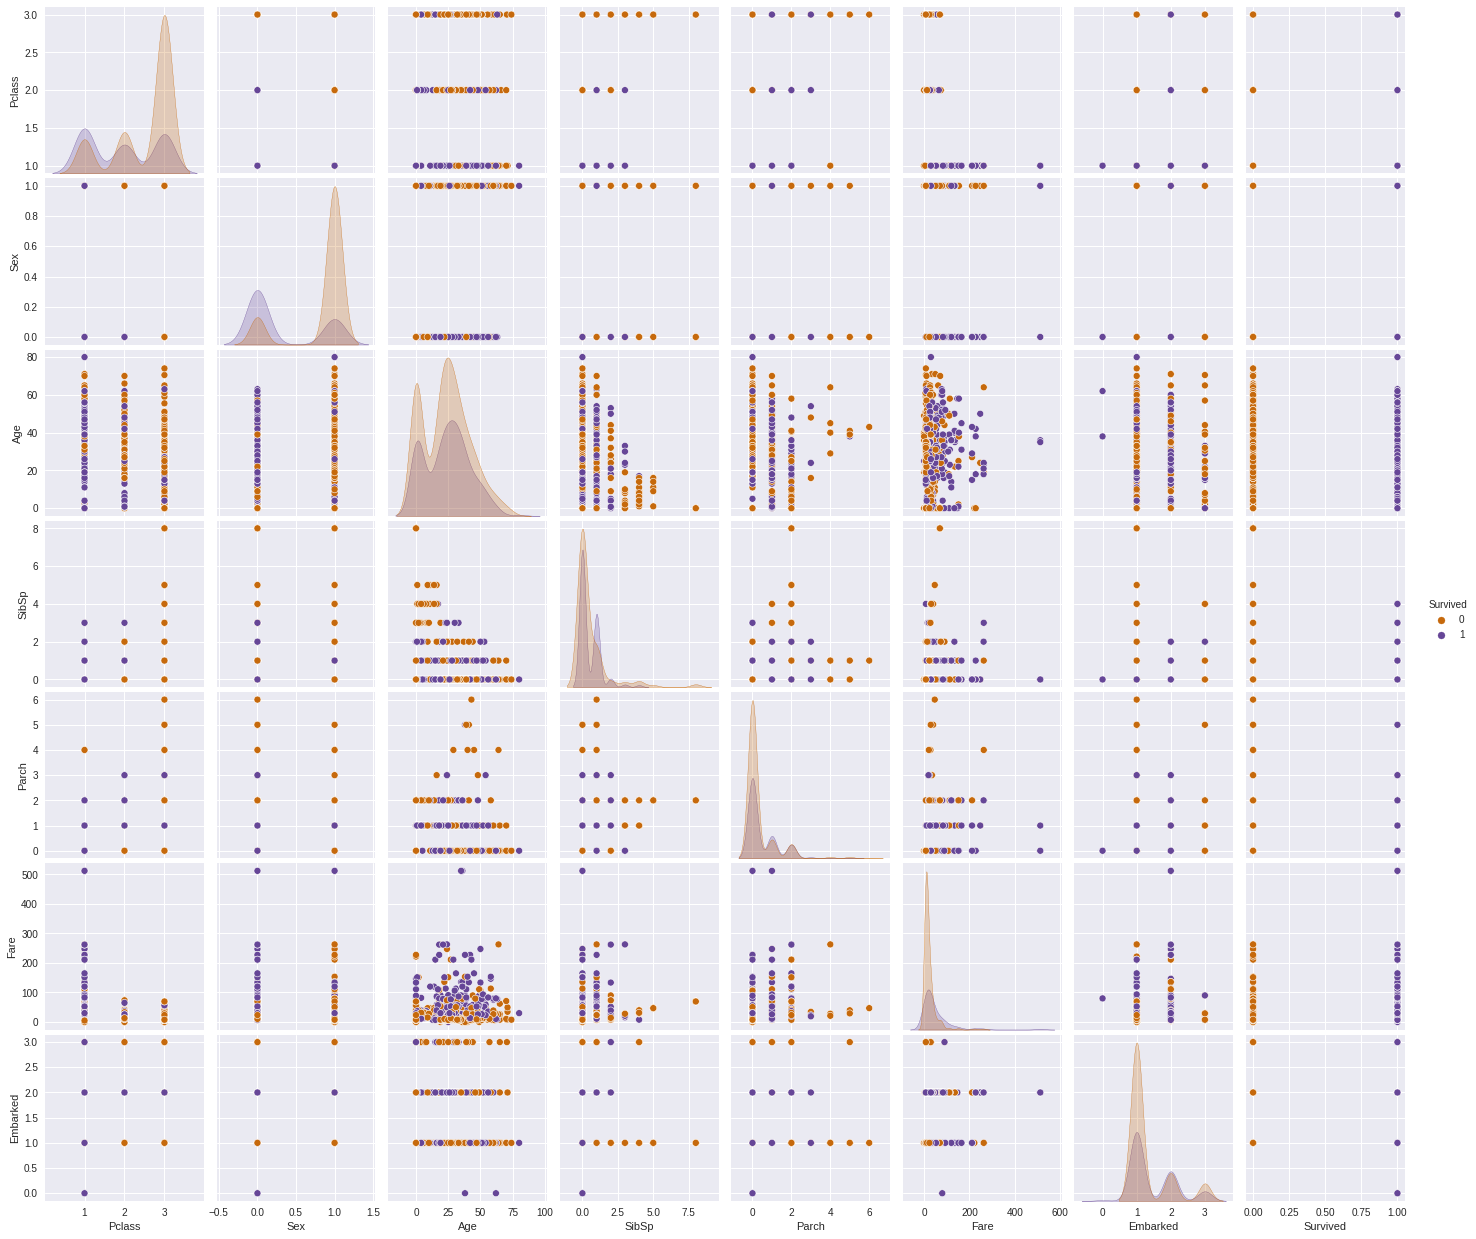

In [ ]:
sb.pairplot(data = train_updated, x_vars = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Survived"],
            y_vars = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"], hue = "Survived");

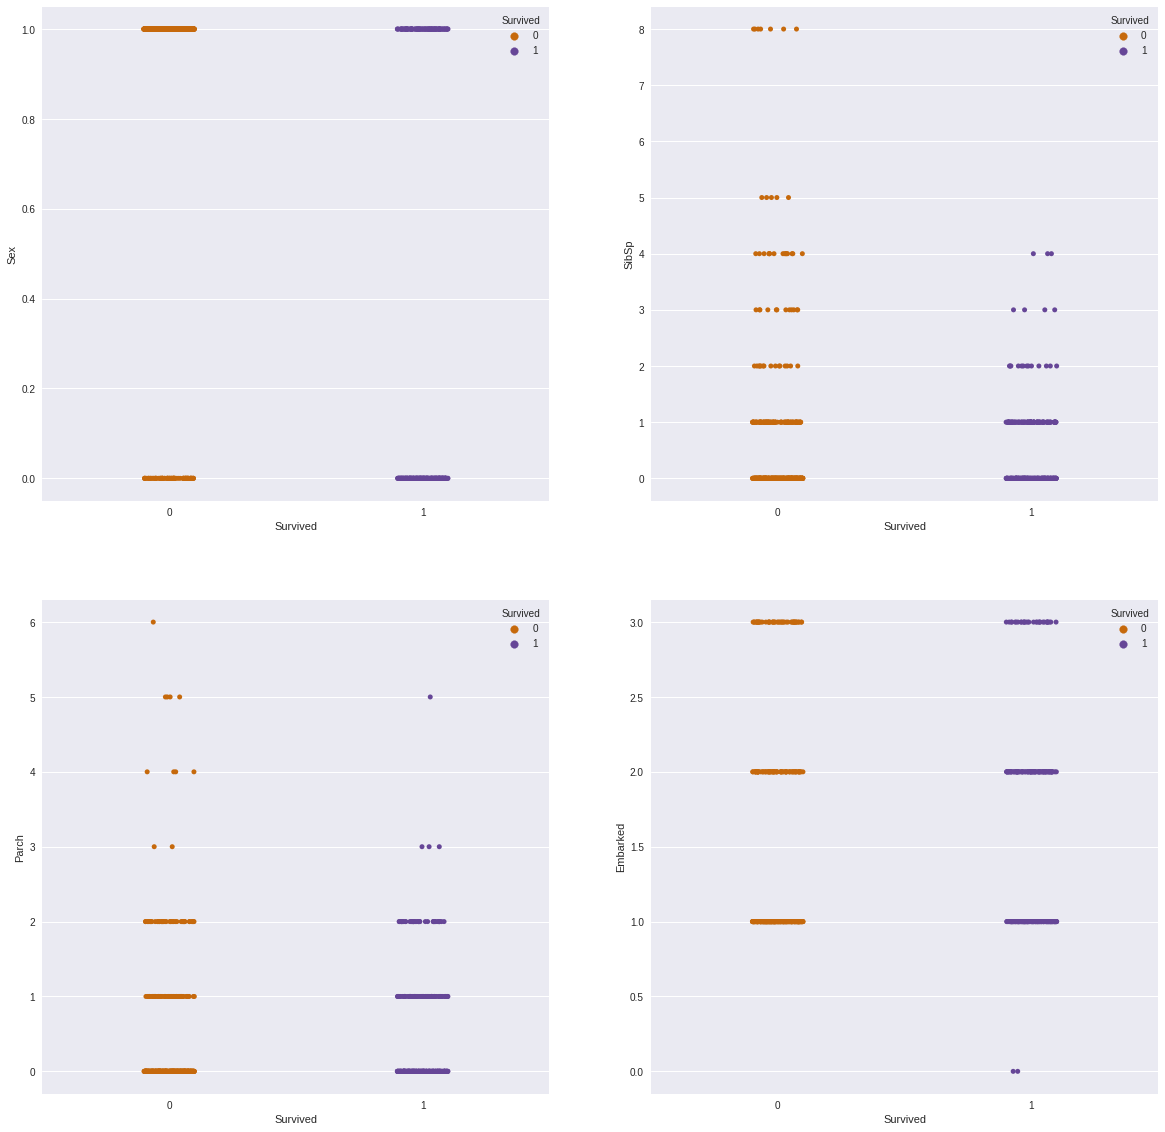

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 20))

sb.stripplot(x = "Survived", y = "Sex", hue = "Survived", data = train_updated, ax = axarr[0][0]);
sb.stripplot(x = "Survived", y = "SibSp", hue = "Survived", data = train_updated, ax = axarr[0][1]);
sb.stripplot(x = "Survived", y = "Parch", hue = "Survived", data = train_updated, ax = axarr[1][0]);
sb.stripplot(x = "Survived", y = "Embarked", hue = "Survived", data = train_updated, ax = axarr[1][1]);

In [ ]:
train_data = train_updated.sample(frac = 0.8, random_state = 4)
validation_data = train_updated.drop(train_data.index)

In [ ]:
print(train_data.shape)
print(validation_data.shape)

(713, 8)
(178, 8)


In [ ]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
646,3,1,19.0,0,0,7.8958,1,0
876,3,1,20.0,0,0,9.8458,1,0
359,3,0,0.0,0,0,7.8792,3,1
194,1,0,44.0,0,0,27.7208,2,1
819,3,1,10.0,3,2,27.9000,1,0


In [ ]:
validation_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,1,0
5,3,1,0.0,0,0,8.4583,3,0
7,3,1,2.0,3,1,21.0750,1,0
9,2,0,14.0,1,0,30.0708,2,1
10,3,0,4.0,1,1,16.7000,1,1


In [ ]:
train_features = train_data.copy()
validation_features = validation_data.copy()

In [ ]:
train_features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
646,3,1,19.0,0,0,7.8958,1,0
876,3,1,20.0,0,0,9.8458,1,0
359,3,0,0.0,0,0,7.8792,3,1
194,1,0,44.0,0,0,27.7208,2,1
819,3,1,10.0,3,2,27.9000,1,0


In [ ]:
validation_features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,1,0
5,3,1,0.0,0,0,8.4583,3,0
7,3,1,2.0,3,1,21.0750,1,0
9,2,0,14.0,1,0,30.0708,2,1
10,3,0,4.0,1,1,16.7000,1,1


In [ ]:
train_labels = train_features.pop("Survived")
validation_labels = validation_features.pop("Survived")

In [ ]:
train_labels.head()

646    0
876    0
359    1
194    1
819    0
Name: Survived, dtype: int64

In [ ]:
validation_labels.head()

0     0
5     0
7     0
9     1
10    1
Name: Survived, dtype: int64

In [ ]:
train_features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
646,3,1,19.0,0,0,7.8958,1
876,3,1,20.0,0,0,9.8458,1
359,3,0,0.0,0,0,7.8792,3
194,1,0,44.0,0,0,27.7208,2
819,3,1,10.0,3,2,27.9000,1


In [ ]:
validation_features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,1
5,3,1,0.0,0,0,8.4583,3
7,3,1,2.0,3,1,21.0750,1
9,2,0,14.0,1,0,30.0708,2
10,3,0,4.0,1,1,16.7000,1


In [ ]:
len(train_features.columns)

7

In [ ]:
import math
features = len(train_features.columns)
input_neurons = math.ceil((2*features)/3)
input_neurons

5

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units = input_neurons, activation = "relu"),
                             tf.keras.layers.Dense(units = 2*input_neurons, activation = "relu"), 
                              tf.keras.layers.Dense(units = 1, activation = "sigmoid")])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001), loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model.fit(train_features, train_labels, epochs = 1000, validation_data = (validation_features, validation_labels))

Epoch 1/1000
23/23 [==============================] - 1s 9ms/step - loss: 2.3082 - accuracy: 0.4292 - val_loss: 1.7625 - val_accuracy: 0.4719
Epoch 2/1000
23/23 [==============================] - 0s 3ms/step - loss: 1.6561 - accuracy: 0.4320 - val_loss: 1.3403 - val_accuracy: 0.4663
Epoch 3/1000
23/23 [==============================] - 0s 3ms/step - loss: 1.2750 - accuracy: 0.4306 - val_loss: 1.0451 - val_accuracy: 0.4551
Epoch 4/1000
23/23 [==============================] - 0s 4ms/step - loss: 1.0048 - accuracy: 0.4320 - val_loss: 0.8371 - val_accuracy: 0.4382
Epoch 5/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.8287 - accuracy: 0.4292 - val_loss: 0.7405 - val_accuracy: 0.4382
Epoch 6/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.7303 - accuracy: 0.4853 - val_loss: 0.7110 - val_accuracy: 0.4775
Epoch 7/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.5764 - val_loss: 0.6720 - val_accuracy: 0.6124
Epoch 

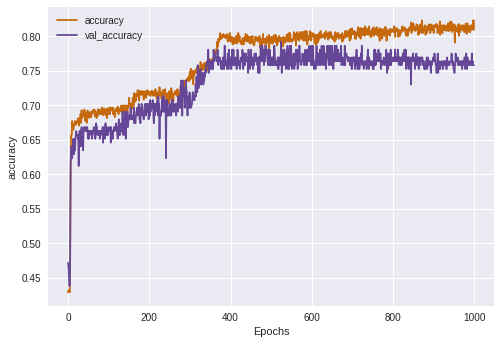

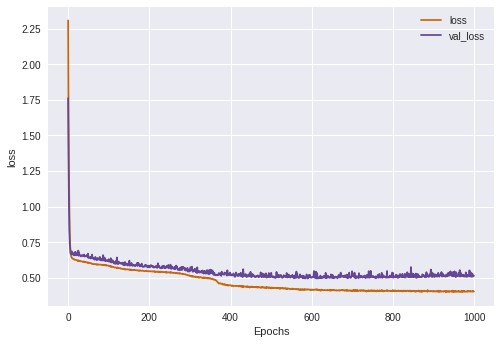

In [ ]:
def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, "val_"+string])
  plt.show()

plot_graph(history, "accuracy")
plot_graph(history, "loss")

In [ ]:
predictions = model.predict(validation_features)
predictions.flatten()

array([1.86542675e-01, 1.36474311e-01, 5.27374978e-05, 8.74479771e-01,
       6.66768312e-01, 2.89017171e-01, 3.27470660e-01, 7.82162309e-01,
       5.84828973e-01, 6.32510304e-01, 1.69379145e-01, 9.37698305e-01,
       2.16270462e-01, 8.41457367e-01, 8.57604146e-01, 1.96254216e-02,
       9.47504565e-02, 2.54576296e-01, 4.21821438e-02, 3.29689197e-02,
       2.37650890e-02, 7.28773952e-01, 6.51205182e-01, 2.19111994e-01,
       1.02613024e-01, 3.09868395e-01, 6.48299828e-02, 1.88531652e-01,
       1.32018089e-01, 8.78141969e-02, 9.57975924e-01, 5.97302496e-01,
       8.14186454e-01, 1.55605808e-01, 9.12984386e-02, 2.31055796e-01,
       5.56739926e-01, 1.12654835e-01, 2.94885755e-01, 8.23651910e-01,
       7.82162309e-01, 5.97428083e-01, 2.04614140e-02, 6.98629677e-01,
       1.65089309e-01, 1.26358196e-02, 1.93094105e-01, 4.83328938e-01,
       7.54410803e-01, 7.82162309e-01, 4.40501630e-01, 1.05281435e-01,
       9.65213180e-01, 1.38148636e-01, 9.74081755e-01, 9.01799276e-02,
      

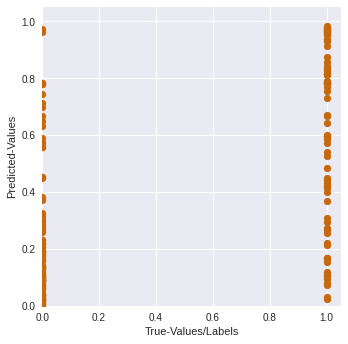

In [ ]:
def prediction_plot(labels, preds):
  plt.scatter(labels, preds)
  plt.xlabel('True-Values/Labels')
  plt.ylabel('Predicted-Values')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0,plt.xlim()[1]])
  plt.ylim([0,plt.ylim()[1]])
  plt.show()

prediction_plot(validation_labels, predictions)